In [2]:
import sqlite3
import pandas as pd
import nltk
from camel_tools.tokenizers.word import simple_word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

"""# Connect to the SQLite database
conn = sqlite3.connect('processed_articles.db')

# Load the articles data into a Pandas DataFrame
query = "SELECT id, published_dt, clean_content, clean_headline FROM articles"
df_articles = pd.read_sql_query(query, conn)"""

df_articles = pd.read_csv('processed_articles(tokenized,stopwords,not lemmetised).csv')

Articles per Month:
month_year
2009-08     832
2009-09     821
2009-10    1008
2009-11    1048
2009-12    1265
2010-01    1371
2010-02    1472
2010-03    2050
2010-04    1876
2010-05    2005
2010-06    1810
2010-07    1664
2010-08    1540
2010-09    1458
2010-10    1718
2010-11    1648
2010-12    1581
2011-01    1769
2011-02    1722
2011-03    1986
2011-04    1686
2011-05    1861
2011-06    1497
2011-07    1263
2011-08    1271
2011-09    1407
2011-10    1512
2011-11    1290
2011-12    1429
2012-01    1421
2012-02    1252
2012-03    1454
2012-04    1295
2012-05    1779
2012-06    1693
2012-07    1935
2012-08    1593
2012-09    1769
2012-10    1758
2012-11    1748
2012-12    1968
2013-01    1910
2013-02    1824
2013-03    1665
2013-04    1690
2013-05    1624
2013-06    1471
2013-07    1387
2013-08    1395
2013-09    1565
2013-10    1466
2013-11    1620
2013-12    1744
2014-01    1804
2014-02    1641
2014-03    1790
2014-04    1789
2014-05    1953
2014-06    1838
2014-07    1160
2014-08  

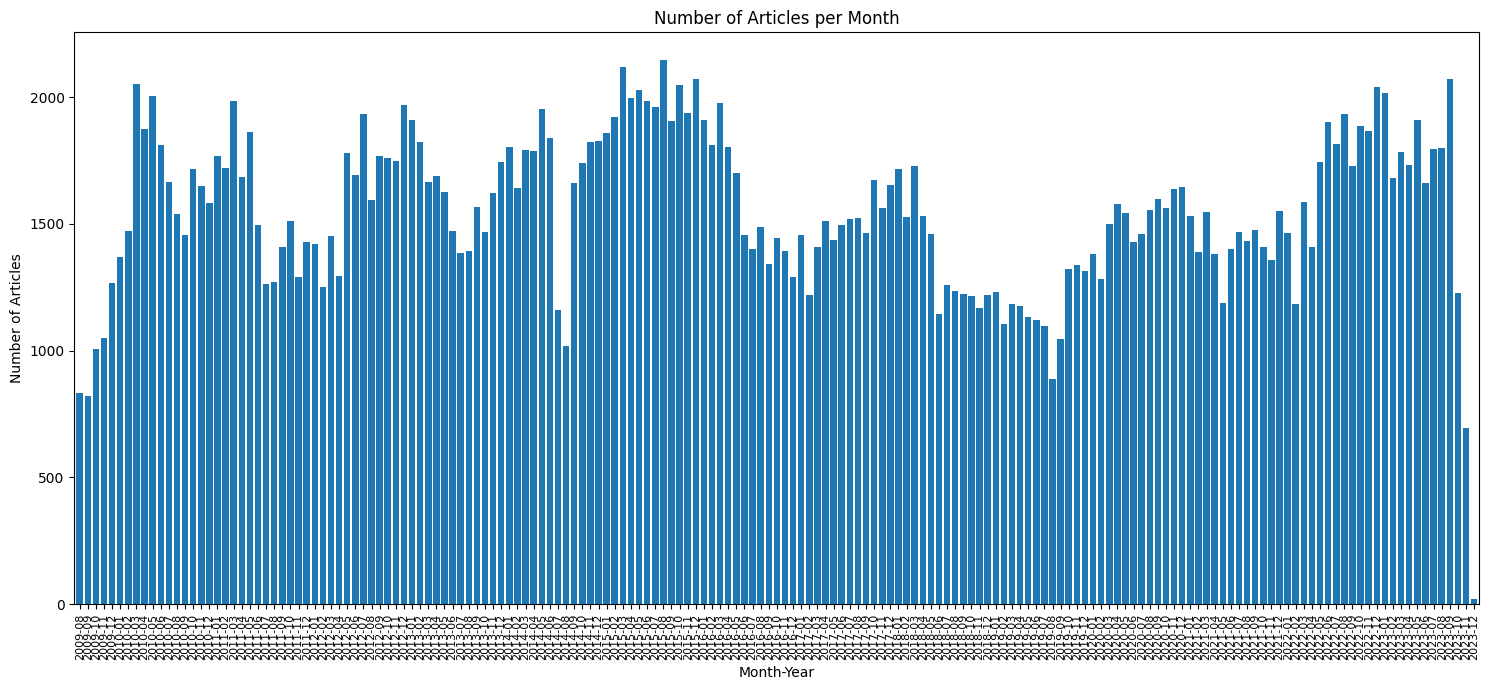

In [33]:
"Number of articles each month" 
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_articles is already loaded with data, including published_dt
# Ensure the published_dt column is a datetime type
df_articles['published_dt'] = pd.to_datetime(df_articles['published_dt'], errors='coerce')

# Filter out unrealistic dates (e.g., before 2000 and future dates)
df_articles = df_articles[(df_articles['published_dt'] >= '2000-01-01') &
                          (df_articles['published_dt'] <= '2023-12-31')]

# Create a new column for month-year for grouping
df_articles['month_year'] = df_articles['published_dt'].dt.to_period('M')

# Group by month_year to count articles
monthly_articles = df_articles.groupby('month_year').size()

# Print the entire list of articles per month
print("Articles per Month:")
print(monthly_articles.to_string())  # Ensure full output is printed

# Plot number of articles per month with enhanced readability
monthly_articles.plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title('Number of Articles per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-ticks and adjust fontsize for visibility
plt.tight_layout()
plt.show()


Mean Articles per Month: 1551.8728323699422
Threshold for High Production: 1865.0608768036873
Threshold for Low Production: 1238.6847879361972

Periods of High Production:
month_year
2010-03    2050
2010-04    1876
2010-05    2005
2011-03    1986
2012-07    1935
2012-12    1968
2013-01    1910
2014-05    1953
2015-02    1920
2015-03    2119
2015-04    1995
2015-05    2028
2015-06    1985
2015-07    1959
2015-08    2148
2015-09    1906
2015-10    2049
2015-11    1939
2015-12    2070
2016-01    1908
2016-03    1978
2022-06    1900
2022-08    1934
2022-10    1886
2022-11    1866
2022-12    2038
2023-01    2016
2023-05    1908
2023-09    2070
Freq: M

Periods of Low Production:
month_year
2009-08     832
2009-09     821
2009-10    1008
2009-11    1048
2014-07    1160
2014-08    1018
2017-02    1220
2018-06    1146
2018-08    1235
2018-09    1225
2018-10    1215
2018-11    1170
2018-12    1220
2019-01    1231
2019-02    1104
2019-03    1183
2019-04    1178
2019-05    1131
2019-06    1121
20

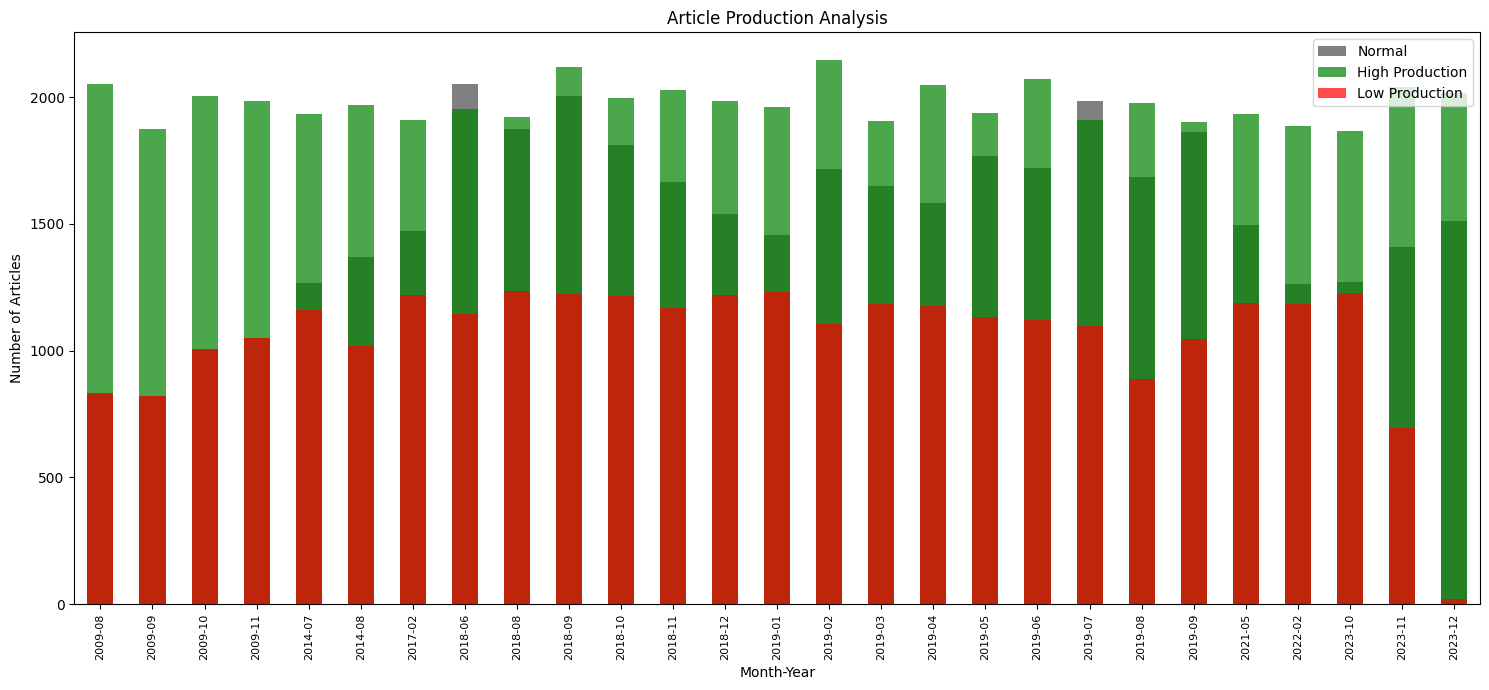

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_articles is already loaded with data, including published_dt
# Ensure the published_dt column is a datetime type
df_articles['published_dt'] = pd.to_datetime(df_articles['published_dt'], errors='coerce')

# Filter out unrealistic dates (e.g., before 2000 and future dates)
df_articles = df_articles[(df_articles['published_dt'] >= '2000-01-01') &
                          (df_articles['published_dt'] <= '2023-12-31')]

# Create a new column for month-year for grouping
df_articles['month_year'] = df_articles['published_dt'].dt.to_period('M')

# Group by month_year to count articles
monthly_articles = df_articles.groupby('month_year').size()

# Calculate mean and standard deviation
mean_articles = monthly_articles.mean()
std_articles = monthly_articles.std()

# Define thresholds for more or less production
high_threshold = mean_articles + std_articles
low_threshold = mean_articles - std_articles

# Find periods of high and low production
high_production_periods = monthly_articles[monthly_articles > high_threshold]
low_production_periods = monthly_articles[monthly_articles < low_threshold]

# Printing analysis
print("Mean Articles per Month:", mean_articles)
print("Threshold for High Production:", high_threshold)
print("Threshold for Low Production:", low_threshold)
print("\nPeriods of High Production:")
print(high_production_periods.to_string())
print("\nPeriods of Low Production:")
print(low_production_periods.to_string())

# Plotting for visual reference
plt.figure(figsize=(15, 7))
monthly_articles.plot(kind='bar', color='gray', label='Normal')
high_production_periods.plot(kind='bar', color='green', label='High Production', alpha=0.7)
low_production_periods.plot(kind='bar', color='red', label='Low Production', alpha=0.7)

plt.title('Article Production Analysis')
plt.xlabel('Month-Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()



Unique Years: <PeriodArray>
['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
 '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
Length: 17, dtype: period[Y-DEC]

Article Counts per Year:
year
2009     4974
2010    20193
2011    18693
2012    19665
2013    19361
2014    20042
2015    23978
2016    19011
2017    17922
2018    16433
2019    13953
2020    18174
2021    17130
2022    20556
2023    18389
2024     5884
2025     1229
Freq: Y-DEC, dtype: int64


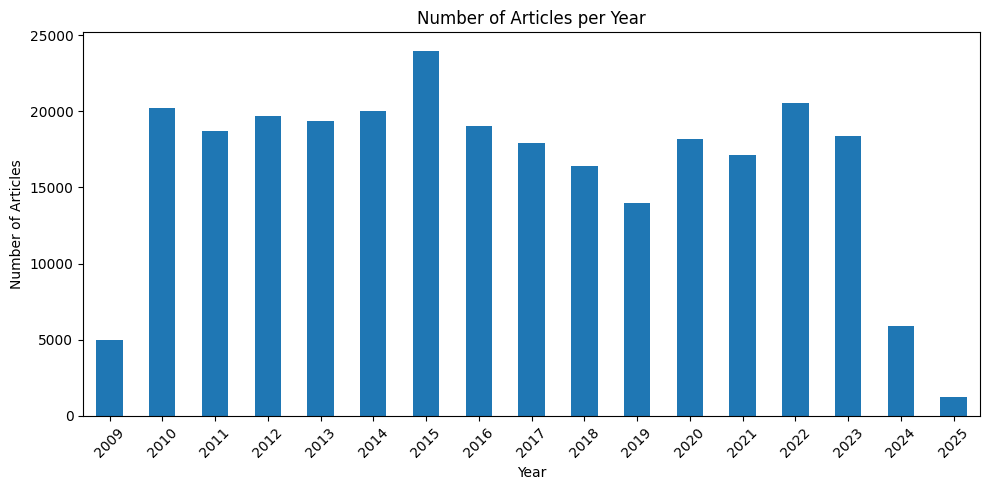

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_articles is already loaded with data, including published_dt

# Ensure the published_dt column is a datetime type
df_articles['published_dt'] = pd.to_datetime(df_articles['published_dt'], errors='coerce')

# Drop rows where the conversion resulted in NaT (Not a Timestamp) due to errors
df_articles.dropna(subset=['published_dt'], inplace=True)

# Create a new column for year for grouping
df_articles['year'] = df_articles['published_dt'].dt.to_period('Y')

# Inspect unique years in your dataset to verify unexpected years
print("Unique Years:", df_articles['year'].unique())

# Filter out year 1999 if still showing anomalous entries
df_articles = df_articles[df_articles['year'] >= '2000']

# Group by year to count articles
yearly_articles = df_articles.groupby('year').size()

# Print the yearly article counts
print("\nArticle Counts per Year:")
print(yearly_articles)

# Plot number of articles per year
yearly_articles.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
